In [35]:
import pandas as pd
import numpy as np

def gen_candidate(t,w,s,c):
  for i in range(0,len(t)-w + 1,s):
    print(i)
    c.append(t[i:i+w])
  return c

In [36]:
c = []
t = [7,2,3,4,6,8,9]

gen_candidate(t,3,2,c)
print(c)

0
2
4
[[7, 2, 3], [3, 4, 6], [6, 8, 9]]


In [38]:
def gen_all_candidates(D,w,s,c):
    for t in D:
        gen_candidate(t,w,s,c)
    return c

In [39]:
D = [
    [7,2,3,4,6,8,9],
    [7,2,5,6],
    [7,2,8,4,6,18,9],
    [6,2,3,4,16,8,29],
    [4,16,8,29]]

y = [0,0,0,1,1]

In [44]:
w = 3
s = 1
c = []
c = gen_all_candidates(D,w,s,c)

print(c)
print(len(c))

# c = sorted(c)
# print(c)

# 將 list 轉為 tuple 再去除重複項
c = list(set(tuple(x) for x in c))
print(c)

c = sorted(list(c))
print(c)

0
1
2
3
4
0
1
0
1
2
3
4
0
1
2
3
4
0
1
[[7, 2, 3], [2, 3, 4], [3, 4, 6], [4, 6, 8], [6, 8, 9], [7, 2, 5], [2, 5, 6], [7, 2, 8], [2, 8, 4], [8, 4, 6], [4, 6, 18], [6, 18, 9], [6, 2, 3], [2, 3, 4], [3, 4, 16], [4, 16, 8], [16, 8, 29], [4, 16, 8], [16, 8, 29]]
19
[(6, 18, 9), (6, 2, 3), (3, 4, 16), (4, 16, 8), (3, 4, 6), (7, 2, 3), (4, 6, 18), (4, 6, 8), (16, 8, 29), (6, 8, 9), (7, 2, 5), (2, 8, 4), (2, 3, 4), (7, 2, 8), (8, 4, 6), (2, 5, 6)]
[(2, 3, 4), (2, 5, 6), (2, 8, 4), (3, 4, 6), (3, 4, 16), (4, 6, 8), (4, 6, 18), (4, 16, 8), (6, 2, 3), (6, 8, 9), (6, 18, 9), (7, 2, 3), (7, 2, 5), (7, 2, 8), (8, 4, 6), (16, 8, 29)]


In [5]:
import sys
x = [5,6,8]
def distance(x,t,s):
  min_dis = sys.maxsize
  for i in range(0,len(t)-len(x)+1):
    dis = 0
    for j in range(len(x)):
      dis = dis + abs(t[i+j]-x[j])
      if dis < min_dis:
        min_dis = dis
        s = i
  return min_dis

In [47]:
#a:time series
#w:window size
#s:sliding size
#c:candidate set
# c = []
# t = [7,2,3,4,6,8,9]
def gen_candidate(t,w,s,c):
  for i in range(0,len(t)-w+1,s):
    c.append(tuple(t[i:i+w]))
  return c

In [48]:
def build_DM(D,c,s):

  M = []

  for t in D:
    row = []
    for x in c:
      row.append(distance(x,t,s))
    M.append(row)

  print(M)
  return M

In [49]:
build_DM(D,c,s)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9], [0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 9], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0], [2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 0]]


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9],
 [0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 9],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0],
 [2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 0]]

In [50]:
def list_to_dataframe(matrix):
  if not matrix:
    return pd.DataFrame()
  columns = []
  for i in range(len(matrix[0])):
    columns.append("S"+str(i))

  df = pd.DataFrame(matrix,columns=columns)
  return df


In [51]:
# 產生欄位名稱 S0, S1, ...,Sm
M = build_DM(D,c,s)
df_matrix = list_to_dataframe(M)
print(df_matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9], [0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 9], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0], [2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 0]]
   S0  S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  S11  S12  S13  S14  S15
0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    1    9
1   0   0   0   1   1   2   2   2   1   1    1    0    0    0    1    9
2   0   0   0   1   1   0   0   0   0   0    0    0    0    0    0    8
3   0   0   0   0   0   0   0   0   0   0    0    1    1    1    2    0
4   2   2   2   1   1   0   0   0   2   2    2    3    3    3    4    0


In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy')
x_train = df_matrix
y_train = y
tree.fit(x_train,y_train)
print(tree)

DecisionTreeClassifier(criterion='entropy')


In [54]:
from sklearn.tree import export_text
tree_text = export_text(tree,feature_names = list(x_train.columns)) # 很重要，否則只會顯示 X[0]
print(tree_text)

|--- S13 <= 0.50
|   |--- class: 0
|--- S13 >  0.50
|   |--- class: 1



In [55]:
# 取出所有被用到的 feature index
feature_indices = tree.tree_.feature
print(feature_indices)
used_indices = feature_indices[feature_indices >= 0]

# 轉成欄位名稱（去除重複）
used_features = list(x_train.columns[used_indices])
print("決策樹用到的欄位", used_features)

[13 -2 -2]
決策樹用到的欄位 ['S13']


In [64]:
map = {}
for i in range(len(c)):
  map['S' + str(i)] = c[i]

print(map)

{'S0': (2, 3, 4), 'S1': (2, 5, 6), 'S2': (2, 8, 4), 'S3': (3, 4, 6), 'S4': (3, 4, 16), 'S5': (4, 6, 8), 'S6': (4, 6, 18), 'S7': (4, 16, 8), 'S8': (6, 2, 3), 'S9': (6, 8, 9), 'S10': (6, 18, 9), 'S11': (7, 2, 3), 'S12': (7, 2, 5), 'S13': (7, 2, 8), 'S14': (8, 4, 6), 'S15': (16, 8, 29)}


In [61]:
test_data = [
    [2,3,4,6,8,9,7],
    [7,6,8,29],
    [7,2,8,2,3,4,9],
    [6,2,3,4,16,8,29],
    [4,16,8,29]
]

y_test = [0,0,0,1,1]

In [62]:
x_test = build_DM(test_data,c,1)
print(x_test)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 8], [4, 4, 4, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 9], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0], [2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 8], [4, 4, 4, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 9], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0], [2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 4, 0]]


In [63]:
df_x_test = list_to_dataframe(x_test)
print(df_x_test)

   S0  S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  S11  S12  S13  S14  S15
0   0   0   0   0   0   0   0   0   0   0    0    1    1    1    0    8
1   4   4   4   3   3   2   2   2   0   0    0    0    0    0    1    9
2   0   0   0   0   0   1   1   1   1   1    1    0    0    0    0    8
3   0   0   0   0   0   0   0   0   0   0    0    1    1    1    2    0
4   2   2   2   1   1   0   0   0   2   2    2    3    3    3    4    0


In [60]:
from sklearn import metrics
import numpy as np
expected = np.array(y_test)
print(expected)

predicted = tree.predict(df_x_test)
print(predicted)

print(metrics.confusion_matrix(expected, predicted))
print(metrics.classification_report(expected, predicted))

[0 0 0 1 1]
[1 0 0 1 1]
[[2 1]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [65]:
# （模擬 time series database）
np.random.seed(0)
# class 0 ：中間有凹陷
class0 = [np.concatenate([np.random.randn(20),-3 + np.random.randn(10),np.random.randn(20)]) for _ in range(5)]
# class 1 ：中間有凸起
class1 = [np.concatenate([np.random.randn(20),3 + np.random.randn(10),np.random.randn(20)]) for _ in range(5)]
print('class0=',class0)
print('class1=',class1)
dataset = np.array(class0 + class1)
labels = np.array([0]*5 + [1]*5)

class0= [array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -5.55298982, -2.3463814 , -2.1355638 , -3.74216502, -0.73024538,
       -4.45436567, -2.95424148, -3.18718385, -1.46722079, -1.53064123,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028]), array([-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.9072

In [66]:
df_x = pd.DataFrame(dataset)
print(df_x)
df_y = pd.DataFrame(labels, columns=['class'])
colors = {0:'red',1:'green'}

         0         1         2         3         4         5         6   \
0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
1 -0.895467  0.386902 -0.510805 -1.180632 -0.028182  0.428332  0.066517   
2  1.883151 -1.347759 -1.270485  0.969397 -1.173123  1.943621 -0.413619   
3 -0.068242  1.713343 -0.744755 -0.826439 -0.098453 -0.663478  1.126636   
4 -0.369182 -0.239379  1.099660  0.655264  0.640132 -1.616956 -0.024326   
5  0.521065 -0.575788  0.141953 -0.319328  0.691539  0.694749 -0.725597   
6 -1.306527  1.658131 -0.118164 -0.680178  0.666383 -0.460720 -1.334258   
7 -0.764144 -1.437791  1.364532 -0.689449 -0.652294 -0.521189 -1.843070   
8 -0.598654 -1.115897  0.766663  0.356293 -1.768538  0.355482  0.814520   
9 -1.054628  0.820248  0.463130  0.279096  0.338904  2.021044 -0.468864   

         7         8         9   ...        40        41        42        43  \
0 -0.151357 -0.103219  0.410599  ... -1.048553 -1.420018 -1.706270  1.950775   
1  0.302472 -0

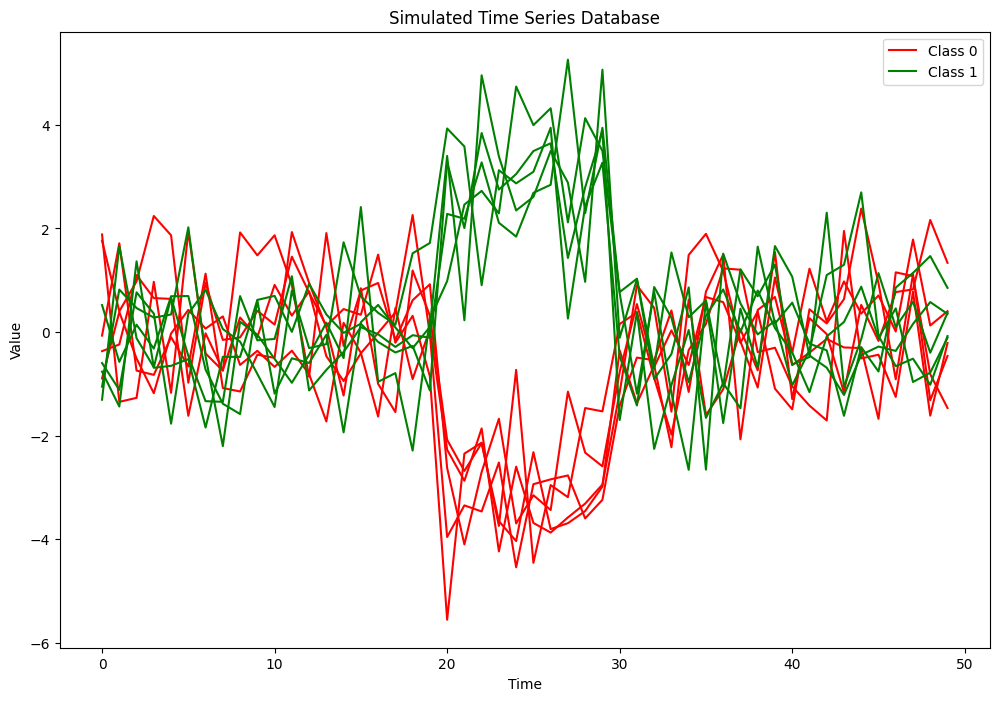

In [69]:
import matplotlib.pyplot as plt
df_z = pd.concat([df_x, df_y],axis = 1)

plt.figure(figsize=(12,8))

# 畫 time series
for idx, row in df_z.iterrows():
  c = colors[row['class']]
  plt.plot(row[:-1],color = c)
# loop 之外，獨立畫 legend (空plot)
for cls, color in colors.items():
  plt.plot([],[],color = color,label=f"Class {cls}")

plt.title("Simulated Time Series Database")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

In [70]:
def calculate_gini_index(y: np.ndarray) -> float:
  if len(y) == 0:
    return -1
  _, counts = np.unique(y, return_counts=True)
  print(counts)
  probs = counts / len(y)
  sum_of_squares = np.sum(probs ** 2)
  return 1 - sum_of_squares

In [71]:
calculate_gini_index(y)

[3 2]


np.float64(0.48)

In [73]:
def find_best_split(X,y):
  m =len(X)
  initial_gini = calculate_gini_index(y)

  #排序
  sorted_indices = np.argsort(X)
  X_sorted = X[sorted_indices]
  y_sorted = y[sorted_indices]

  max_gini_gain = 0
  best_split_point = -1
  best_weighted_gini = initial_gini

  for i in range(1,m):
    # 避免重複切割
    if X in range(1,m):
      y_left = y_sorted[:i]
      y_right = y_sorted[i:]
      gini_left = calculate_gini_index(y_left)
      gini_right = calculate_gini_index(y_right)

      weighted_gini = len(y_left) / m * gini_left + len(y_right) / m * gini_right

      gini_gain = initial_gini - weighted_gini

      if gini_gain > max_gini_gain:
        max_gini_gain = gini_gain
        best_split_point = (X_sorted[i-1]+X_sorted[i])/2
        best_weighted_gini = weighted_gini

    if max_gini_gain > 0:
      return best_split_point,max_gini_gain,best_weighted_gini
    else:
      return -1,0,0,-1

In [75]:
def feature_gini_gain(df_matrix: pd.DataFrame,y):
  """
  對 df_matrix 中每一個 column 計算
  - 最佳切點
  - 最大 Gini Gain
  """
  y_np = np.array(y)
  results = []

  for col in df_matrix.columns:
    X = df.matrix[col].to_numpy()

    best_cut,gini_gain = find_best_split(X,y_np)

    results.append({"feature": col,
            "best_cut_point": best_cut,
            "gini_gain": gini_gain })
  return pd.DataFrame(results)